In [1]:
import pandas as pd
# import glob
# from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm
import joblib
from tabulate import tabulate

# data science libraries
from sklearn.pipeline import Pipeline
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold 
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

# custom modules
from package import my_modules
from package import decorators

In [2]:
rng = np.random.RandomState(42)

In [3]:
# read the median datasets
X_train_cleaned_median, X_test_cleaned_median, X_holdout_cleaned_median,y_train, y_test, y_holdout = joblib.load("../out_files/cleaned_splits/split_data_cleaned_median.joblib")

In [4]:
# Define the scoring metric (e.g., F2 score)
ftwo_score = make_scorer(fbeta_score, beta=2)

Training logistic_regression model...


Pipeline(steps=[('imputer', KNNImputer()), ('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(class_weight='balanced',
                                    random_state=RandomState(MT19937) at 0x7EE988D65740,
                                    solver='liblinear'))])

Calculating PR AUC...
Model PR AUC: 0.51


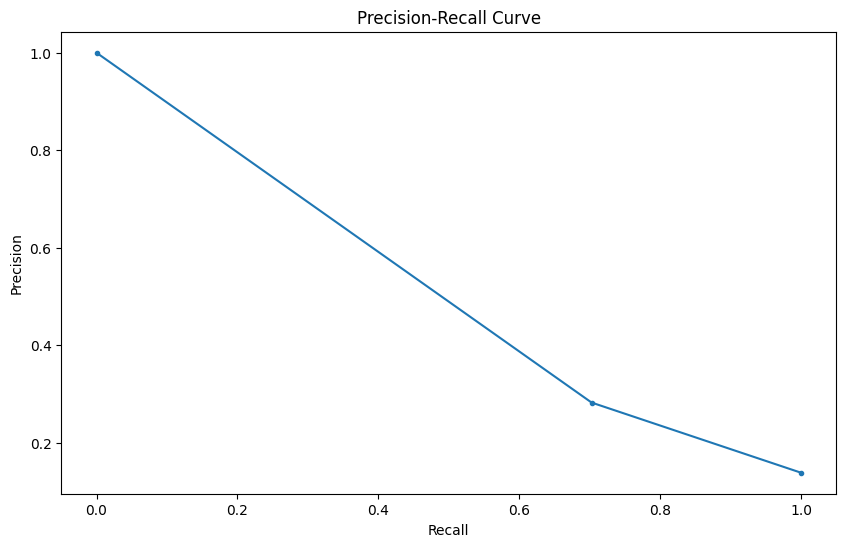

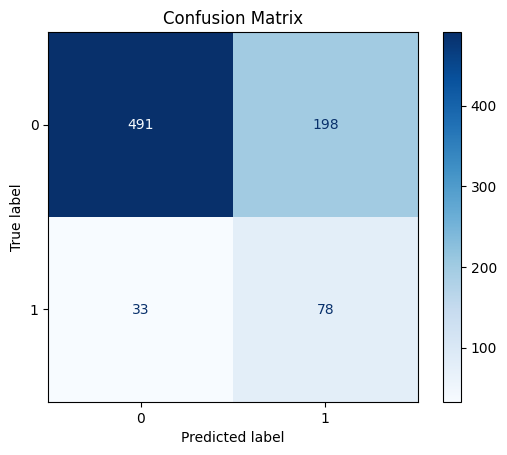

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.71      0.81       689
           1       0.28      0.70      0.40       111

    accuracy                           0.71       800
   macro avg       0.61      0.71      0.61       800
weighted avg       0.85      0.71      0.75       800



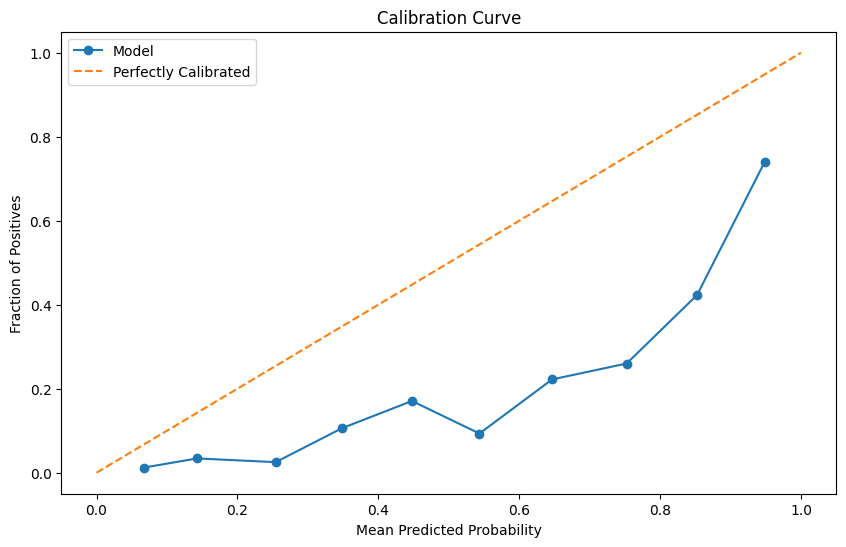

logistic_regression model does not have feature importances.
Training random_forest model...


Pipeline(steps=[('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=RandomState(MT19937) at 0x7EE988D65740))])

Calculating PR AUC...
Model PR AUC: 0.46


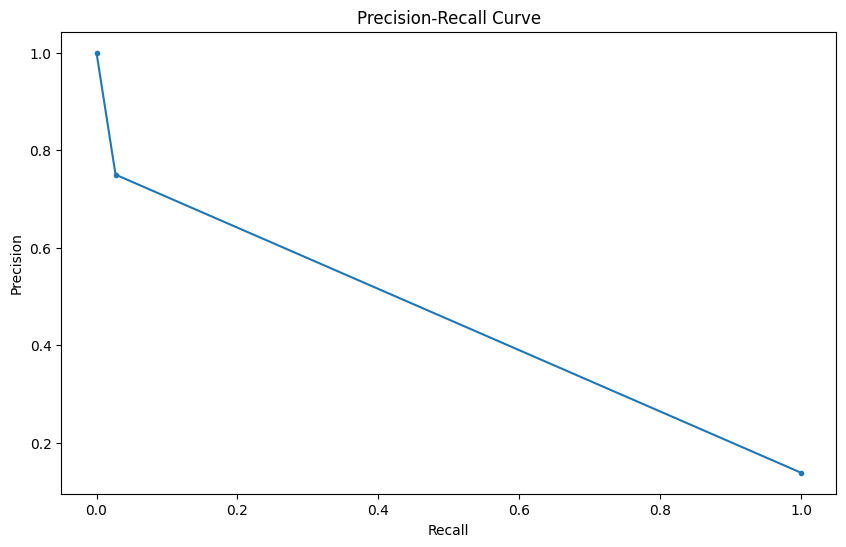

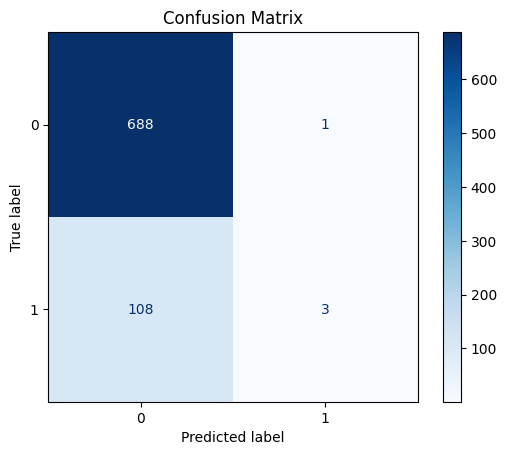

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       689
           1       0.75      0.03      0.05       111

    accuracy                           0.86       800
   macro avg       0.81      0.51      0.49       800
weighted avg       0.85      0.86      0.81       800



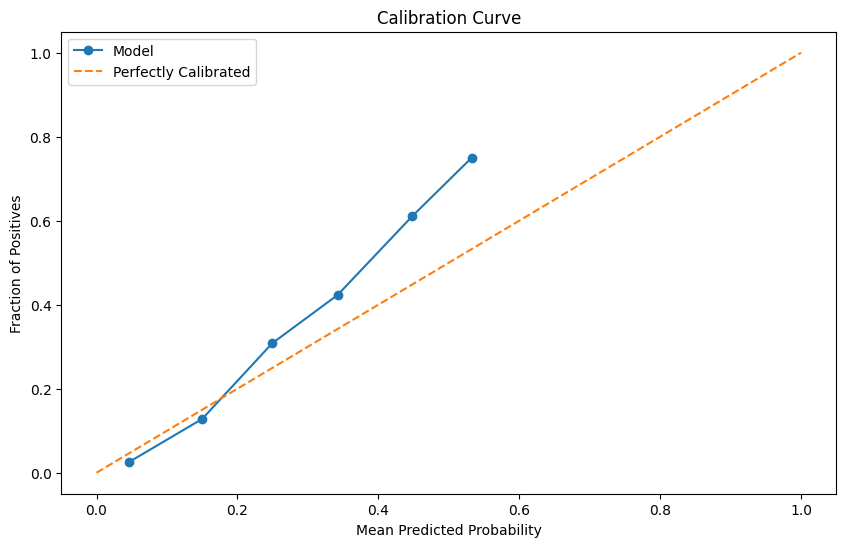

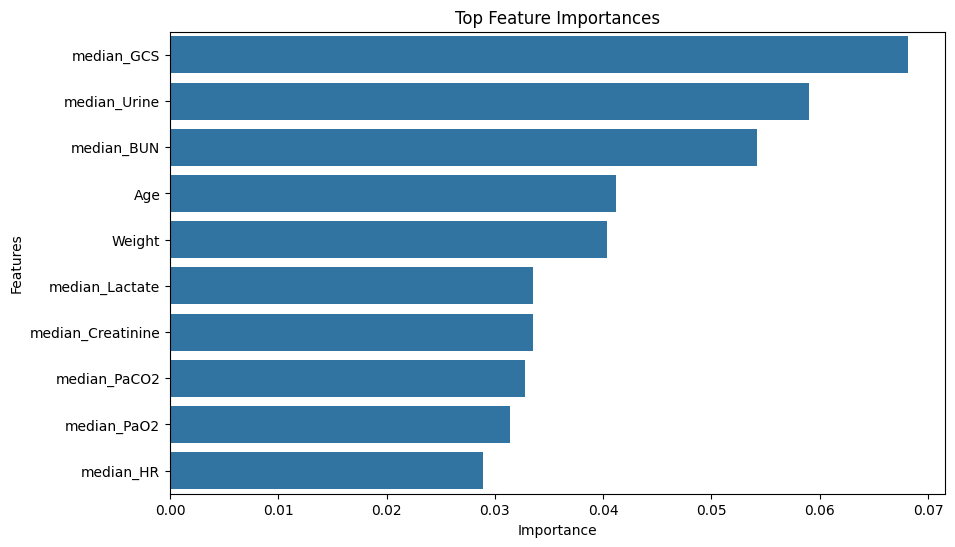

Training xgboost model...


Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

Calculating PR AUC...
Model PR AUC: 0.52


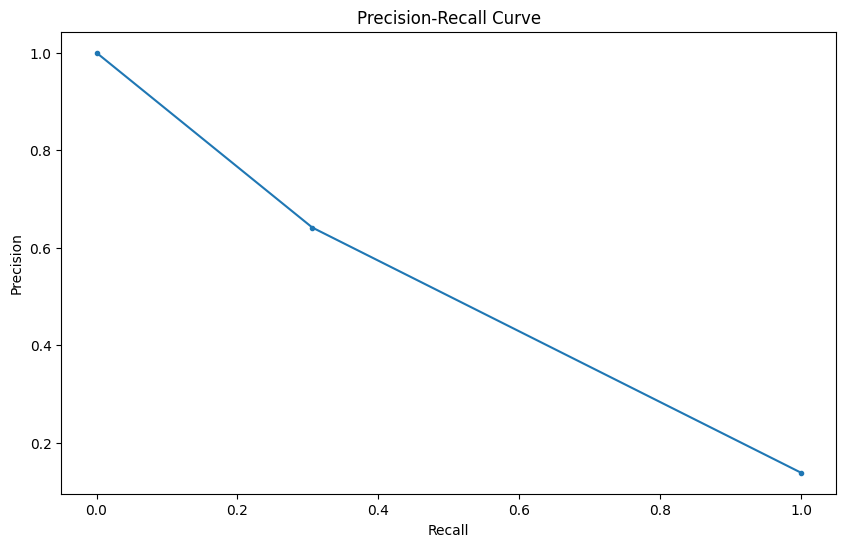

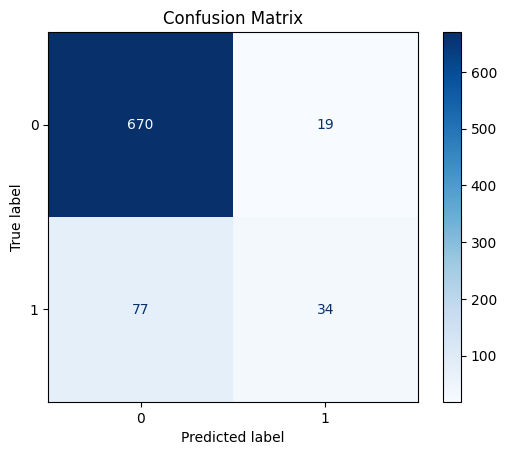

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       689
           1       0.64      0.31      0.41       111

    accuracy                           0.88       800
   macro avg       0.77      0.64      0.67       800
weighted avg       0.86      0.88      0.86       800



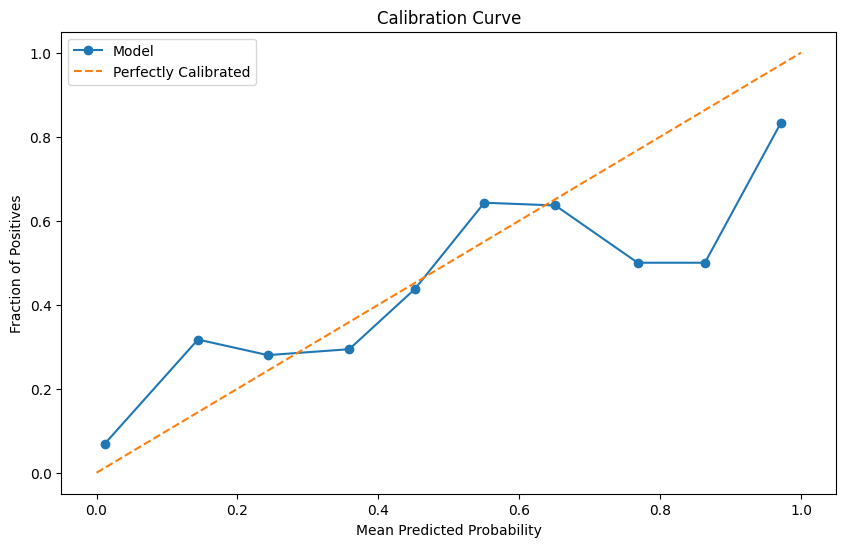

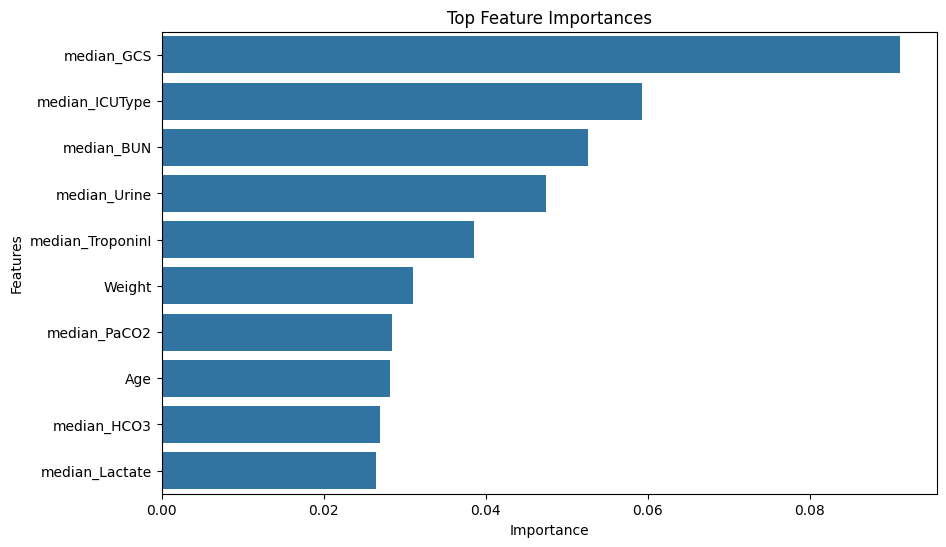

In [5]:
# run logistic regression, random forest and xgboost
model_factory = {
    'logistic_regression': Pipeline([
        ('imputer', KNNImputer(n_neighbors=5)),
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(solver='liblinear', random_state=rng, class_weight='balanced'))
    ]),
    'random_forest': Pipeline([
        # ('imputer', KNNImputer(n_neighbors=5)),
        # ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier(random_state=rng, class_weight='balanced')) 
    ]),
    'xgboost': Pipeline([
        # ('imputer', KNNImputer(n_neighbors=5)),
        # ('scaler', StandardScaler()),
        ('classifier', XGBClassifier(random_state=rng, scorer= ftwo_score))
    ])
}


for model_name, model in model_factory.items():
    print(f"Training {model_name} model...")
    model.fit(X_train_cleaned_median, y_train)
    my_modules.evaluate_model(model, X_test_cleaned_median, y_test)
    # plot feature importances
    if hasattr(model.named_steps['classifier'], 'feature_importances_'):
        feature_importances = my_modules.get_feature_importances(model.named_steps['classifier'], X_train_cleaned_median, y_train)
        n_features_to_plot = min(10, len(feature_importances))
        my_modules.plot_feature_importances(feature_importances, n=n_features_to_plot)
    else:
        print(f"{model_name} model does not have feature importances.")   
        
        
        